# In-class Linear Regression Demo

Adjusted by Adi Bronshtein and Jeff Hale

## Learning Objectives:
- Identify a Target Variable
- Explore the Scikit-learn linear regression API: `.fit`/`.predict`
- Visualize our predictions
- Find our residuals
- Compute MSE
- Compute and interpret R-squared

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

We'll use a dataset from [this website](http://users.stat.ufl.edu/~winner/datasets.html) at the University of Florida.

## Single Linear Regression:

In [2]:
# LSD and Math Scores
# http://users.stat.ufl.edu/~winner/data/lsd.txt
df_lsd = pd.read_csv(
    'http://users.stat.ufl.edu/~winner/data/lsd.dat',
    names=['LSD','Math'], sep='\s+',
    header=None
)

In [3]:
# check out the DataFrame
df_lsd.head()

,LSD,Math
0,1.17,78.93
1,2.97,58.20
2,3.26,67.47
3,4.69,37.47
4,5.83,45.65


In [4]:
# get the info() on the data
df_lsd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
LSD     7 non-null float64
Math    7 non-null float64
dtypes: float64(2)
memory usage: 240.0 bytes


In [6]:
# shape of the data
df_lsd.shape

(7, 2)

In [10]:
# make summary/descriptive statistics of the data
df_lsd.describe()

,LSD,Math
count,7.000000,7.000000
mean,4.332857,50.087143
std,1.935413,18.610854
min,1.170000,29.970000
25%,3.115000,35.195000
50%,4.690000,45.650000
75%,5.915000,62.835000
max,6.410000,78.930000


In [11]:
# Any missing values
df_lsd.isna().sum

<bound method DataFrame.sum of      LSD   Math
0  False  False
1  False  False
2  False  False
3  False  False
4  False  False
5  False  False
6  False  False>

In [12]:
# create x and y
X = df_lsd['LSD']
y = df_lsd['Math']


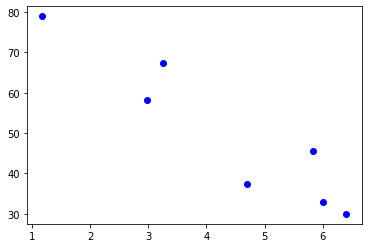

In [24]:
# make a scatter plot of x and y
plt.scatter(df_lsd['LSD'],
            df_lsd['Math'],
            color = 'blue')


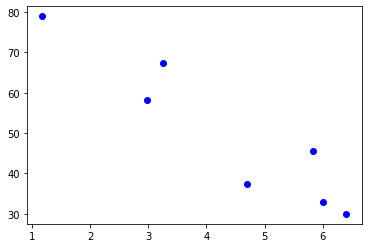

In [55]:
plt.scatter(X,y,color = 'blue')

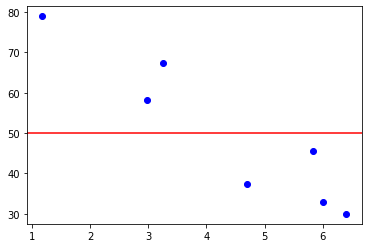

In [25]:
# Add mean of `y` to your plot as a horizontal line
plt.scatter(df_lsd['LSD'],
            df_lsd['Math'],
            color = 'blue')
plt.axhline(y.mean(), c='r')

# or use plt.plot([X.min(), X.max()], [y.mean(), y.mean()], c='r', linewidth=5.0);

In [30]:
# get the average math score
np.mean(y)

50.08714285714286

In [31]:
# show the type of X
type(X)

pandas.core.series.Series

In [34]:
# get values of X only
# you will aslso see .values - but .to_numpy() is best practice

X.to_numpy()

array([1.17, 2.97, 3.26, 4.69, 5.83, 6.  , 6.41])

In [38]:
# Annoying transformation need if you only have one feature. 
# No idea why they won't fix it.

X = X.to_numpy().reshape(-1,1)
X

array([[1.17],
       [2.97],
       [3.26],
       [4.69],
       [5.83],
       [6.  ],
       [6.41]])

In [39]:
type(X)

numpy.ndarray

In [ ]:
# verify X and y look like how you think they should

In [42]:
type(y)

pandas.core.series.Series

Stack Overflow thread - [What does -1 mean in numpy reshape?](https://stackoverflow.com/questions/18691084/what-does-1-mean-in-numpy-reshape)

In [ ]:
# Get the type of x after reshape
type(X)

In [43]:
# import linear regression class from sklearn
from sklearn.linear_model import LinearRegression

In [45]:
# Create a linear regression object from the class
model = LinearRegression()

In [46]:
# Fit the model
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
# What is the coefficient?
model.coef_

array([-9.00946642])

In [48]:
# What is the intercept?
model.intercept_

89.12387376799308

In [49]:
# Create the prediction 
y_pred = model.predict(X)

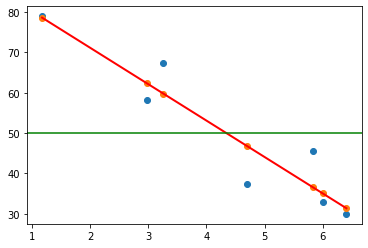

In [50]:
# Let's plot the prediction line
plt.scatter(X, y)
plt.plot(X, y_pred, c='r', linewidth=2.0)
plt.axhline(y.mean(), c='g')
plt.scatter(X, y_pred);

In [51]:
# Let's make predictions on our data
y_hat = y_pred



In [74]:
# notice we pass a nested list or can reshape using 
# np.array([-10].reshape(1,-1))

y_pred.reshape(-1,1)

array([[78.58279806],
       [62.36575851],
       [59.75301325],
       [46.86947628],
       [36.59868457],
       [35.06707528],
       [31.37319405]])

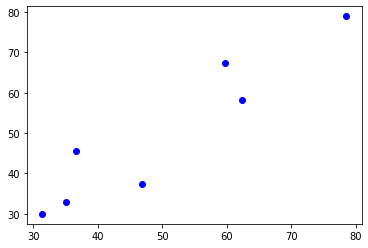

In [75]:
# Plot those predicted values, which is the same as plotting the model
# Plot on on top of the actual values

plt.scatter(y_pred, y, color='blue')

In [76]:
# Calculate residuals with those predicted values:
residuals = y - y_pred

In [ ]:
# Make the residuals a DataFrame for pretty reading 😀

In [77]:
pd.DataFrame(residuals)

,Math
0,0.347202
1,-4.165759
2,7.716987
3,-9.399476
4,9.051315
5,-2.147075
6,-1.403194


In [ ]:
# Plotting the residuals with the null model (average score), the X


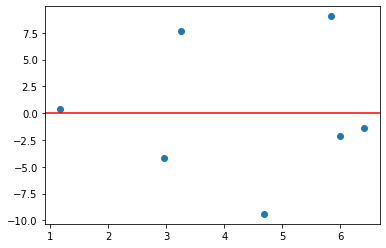

In [78]:
plt.scatter(X, residuals)
plt.axhline(0, color = 'red')

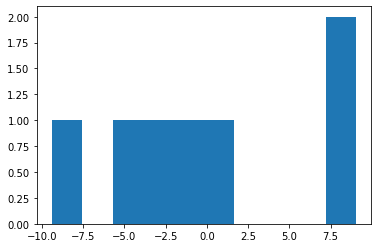

In [79]:
# Plot the residuals by themselves.
# Are they normally distributed? 
plt.hist(residuals);

In [69]:
# import MSE
from sklearn import metrics


In [71]:
# Let's get the MSE
mse = metrics.mean_squared_error(y, y_pred)
mse

36.26876125852443

In [81]:
# RMSE for the Linear Regression model
rmse = np.sqrt(mse)
rmse

6.022355125573751

Create the baseline of a linear regression model just the mean!

Check out this handy NumPy function to help `np.ones_like()` 😀.

In [ ]:
# Make an array full of ones

In [82]:
ones_array = np.ones_like(y)

In [ ]:
y_bar = y.mean()
# Null residuals
resids_null = y - y_bar
# Null sum of squares
ssto = np.sum(resids_null**2)
# R2 by hand
1 - sse / ssto

In [ ]:
# use np.ones_like() as the first step to make an array filled 
# with the mean value (for our baseline predictions)

In [85]:
baseline = np.ones_like(y) * y.mean()

In [89]:
# MSE of the baseline (null model)
mse2 = metrics.mean_squared_error(y, baseline)
mse2

296.8833346938776

In [90]:
# RMSE of the baseline (null model)
rmse2 = np.sqrt(mse2)  
rmse2

17.23030280331363

In [80]:
# What is the R-squared score?
metrics.r2_score(y, y_pred)

0.8778349707775889

$R^{2}$ is the percentage of explained variance - how much of the variance in our target variable `y` we can explain with our model (using our feature matrix). 

Note, this is not not the adjusted $R^{2}$. "The adjusted R-squared is a modified version of R-squared that has been adjusted for the number of predictors in the model. The adjusted R-squared increases only if the new term improves the model more than would be expected by chance. It decreases when a predictor improves the model by less than expected by chance." [Source](https://blog.minitab.com/blog/adventures-in-statistics-2/multiple-regession-analysis-use-adjusted-r-squared-and-predicted-r-squared-to-include-the-correct-number-of-variables)